Detection of Cardiomegaly from Chest X-Ray Images 

Cardiomegaly is a medical condition in which the heart
is enlarged.
A well-known radiographic index
is the cardiothoracic ratio (CTR) which is defined as the
ratio between the maximum transverse cardiac diameter and
the maximum thoracic diameter measured between the inner
margins of ribs

The image data can be categorise in sex (Male and Female) to see if Cardiomegaly is sex related

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/Users/neeharika/Documents/datascience-course/Data-Analysis/Data_Entry_2017.csv") 
print(df.head(3))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  


In [3]:
df.groupby('Patient Gender').size()

Patient Gender
F    48780
M    63340
dtype: int64

In [4]:
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)
Age_below_117 = df['pa_age'] < 117 
df[Age_below_117]
tidy_df=df[Age_below_117]
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 12 columns):
img_index                      112104 non-null object
labels                         112104 non-null object
follow_up                      112104 non-null int64
pa_id                          112104 non-null int64
pa_age                         112104 non-null int64
pa_gender                      112104 non-null object
view_position                  112104 non-null object
OriginalImage[Width            112104 non-null int64
Height]                        112104 non-null int64
OriginalImagePixelSpacing[x    112104 non-null float64
y]                             112104 non-null float64
Unnamed: 11                    0 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 11.1+ MB


In [5]:
Age_below_117 = df['pa_age'] < 117 
df[Age_below_117]
tidy_df=df[Age_below_117]
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112104 entries, 0 to 112119
Data columns (total 12 columns):
img_index                      112104 non-null object
labels                         112104 non-null object
follow_up                      112104 non-null int64
pa_id                          112104 non-null int64
pa_age                         112104 non-null int64
pa_gender                      112104 non-null object
view_position                  112104 non-null object
OriginalImage[Width            112104 non-null int64
Height]                        112104 non-null int64
OriginalImagePixelSpacing[x    112104 non-null float64
y]                             112104 non-null float64
Unnamed: 11                    0 non-null float64
dtypes: float64(3), int64(5), object(4)
memory usage: 11.1+ MB


We can select the image having Cardiomegaly

In [6]:
print(tidy_df['labels'].unique())

['Cardiomegaly' 'Cardiomegaly|Emphysema' 'Cardiomegaly|Effusion'
 'No Finding' 'Hernia' 'Hernia|Infiltration' 'Mass|Nodule' 'Infiltration'
 'Effusion|Infiltration' 'Nodule' 'Emphysema' 'Effusion' 'Atelectasis'
 'Effusion|Mass' 'Emphysema|Pneumothorax' 'Pleural_Thickening'
 'Effusion|Emphysema|Infiltration|Pneumothorax'
 'Emphysema|Infiltration|Pleural_Thickening|Pneumothorax'
 'Effusion|Pneumonia|Pneumothorax' 'Pneumothorax'
 'Effusion|Infiltration|Pneumothorax' 'Infiltration|Mass'
 'Infiltration|Mass|Pneumothorax' 'Mass'
 'Cardiomegaly|Infiltration|Mass|Nodule'
 'Cardiomegaly|Effusion|Emphysema|Mass'
 'Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumothorax' 'Emphysema|Mass'
 'Emphysema|Mass|Pneumothorax' 'Atelectasis|Pneumothorax'
 'Cardiomegaly|Emphysema|Pneumothorax' 'Mass|Pleural_Thickening'
 'Cardiomegaly|Mass|Pleural_Thickening' 'Effusion|Infiltration|Nodule'
 'Atelectasis|Effusion|Pleural_Thickening' 'Fibrosis|Infiltration'
 'Fibrosis|Infiltration|Pleural_Thickening' 'Fibrosis'
 '

In [7]:
tidy_df['Cardiomegaly'] = np.where(tidy_df.loc[:,'labels'].str.contains('Cardiomegaly'),1,0)
print(tidy_df.head())

          img_index                  labels  follow_up  pa_id  pa_age  \
0  00000001_000.png            Cardiomegaly          0      1      58   
1  00000001_001.png  Cardiomegaly|Emphysema          1      1      58   
2  00000001_002.png   Cardiomegaly|Effusion          2      1      58   
3  00000002_000.png              No Finding          0      2      81   
4  00000003_000.png                  Hernia          0      3      81   

  pa_gender view_position  OriginalImage[Width  Height]  \
0         M            PA                 2682     2749   
1         M            PA                 2894     2729   
2         M            PA                 2500     2048   
3         M            PA                 2500     2048   
4         F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  Cardiomegaly  
0                        0.143  0.143          NaN             1  
1                        0.143  0.143          NaN             1  
2    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


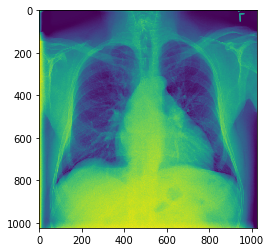

In [8]:
import matplotlib.pyplot as plt
img1 = plt.imread('/Users/neeharika/Documents/datascience-course/Data-Analysis/images-chest/images 1/00000001_000.png')
plt.imshow(img1)

We need to find a trend or a algorithm which defines an image having Cardiomegaly. The size of the heart can be measured through image analysis.
Plan to answer these questions through Convolution Neural Network 